In [1]:
import random
import matplotlib.pyplot as plt
import mglearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D, axes3d

In [2]:
def parsing(s):
    return s[:-2].split(" ")

def str_list_to_int_list(str_list):
    return list(map(int, str_list))

def make_plot(y):  
    x = range(len(y))
    plt.figure(figsize=(15, 5))
    plt.bar(x, y, color="blue")
    plt.show()
    
def make_scatter_masks(lables):
    masks = {1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[]}

    for label in lables:
        masks[label].append(True)
        for i in range(1, 8):
            if i == label:
                continue
            masks[i].append(False)

    for key in masks:
        masks[key] = np.array(masks[key])
    
    return masks

In [3]:
num_of_data = 5000
sensor_num = 3
room_num = 7
DIR = "C:\\Users\\Famous\\Desktop\\CCLAB\\test_data\\test5_data\\"
BASE = "room"
EXT = ".txt"
target = None
result = []
data = None

for sensor in range(0, sensor_num):
    temp = []
        
    for room in range(0, room_num):
        f = open(DIR + BASE + str(room+1) + "_" + str(sensor+1) + "_RSSI" + EXT)

        while True:
            line = f.readline()
            if not line:
                break
            if line == ("\n" or "" or " "):
                continue
                            
            temp.extend(str_list_to_int_list(parsing(line)))
            
    
    result.append(temp)

target = np.empty(0).astype(int)

for r in range(0, room_num):
    temp = np.empty(num_of_data).astype(int)
    temp.fill(r+1)
    target = np.hstack([target, temp])
    
data = result[0]

for i in range(1, len(result)):
    data = np.c_[data, result[i]]

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=1)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\Famous\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


### EXP 1 Accuracy = 96.7%
* Number of rooms = 7
* Number of monitor devices = 3(0, 1, 2)
* Data
    * Training : 26250
    * Test : 8750

In [4]:
from sklearn.svm import SVC

svc = SVC(C=1000, gamma=100, decision_function_shape='ovo')
svc.fit(X_train_scaled, y_train)

print("Training accuracy: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Test accuracy: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Training accuracy: 0.975
Test accuracy: 0.967


### EXP 2 Accuracy = 94.4%
* Number of rooms = 7
* Number of monitor devices = 2(1, 2)
* Data
    * Training : 26250
    * Test : 8750

In [5]:
reduced_data = np.c_[data[:, 1], data[:, 2]]
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(reduced_data, target, random_state=1)
scaler = MinMaxScaler()
X_train_r_scaled = scaler.fit_transform(X_train_r)
X_test_r_scaled = scaler.transform(X_test_r)

svc_r = SVC(C=1000, gamma=100, decision_function_shape='ovo')
svc_r.fit(X_train_r_scaled, y_train_r)

print("Training accuracy: {:.3f}".format(svc_r.score(X_train_r_scaled, y_train_r)))
print("Test accuracy: {:.3f}".format(svc_r.score(X_test_r_scaled, y_test_r)))

C:\Users\Famous\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Training accuracy: 0.948
Test accuracy: 0.944


In [6]:
num_of_data = 5000
sensor_num = 3
room_num = 7
DIR = "C:\\Users\\Famous\\Desktop\\CCLAB\\test_data\\nomalized_data\\"
EXT = ".txt"
target = None
result = []
data = None

for sensor in range(0, sensor_num):
    temp = []
        
    for room in range(0, room_num):
        f = open(DIR + str(room+1) + "_" + str(sensor+1) + "_RSSI.txt" + EXT)

        while True:
            line = f.readline()
            if not line:
                break
            if line == ("\n" or "" or " "):
                continue
                            
            temp.append(int(line))
            
    
    result.append(temp)

target = np.empty(0).astype(int)

for r in range(0, room_num):
    temp = np.empty(num_of_data).astype(int)
    temp.fill(r+1)
    target = np.hstack([target, temp])
    
data = result[0]

for i in range(1, len(result)):
    data = np.c_[data, result[i]]

X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(data, target, random_state=1)
X_train_normal = X_train_normal.astype('float32') / -100.
X_test_normal = X_test_normal.astype('float32') / -100.

In [7]:
num_of_data = 5000
sensor_num = 3
room_num = 7
DIR = "C:\\Users\\Famous\\Desktop\\CCLAB\\test_data\\test5_data\\"
BASE = "room"
EXT = ".txt"
target = None
result = []
data = None

for sensor in range(0, sensor_num):
    temp = []
        
    for room in range(0, room_num):
        f = open(DIR + BASE + str(room+1) + "_" + str(sensor+1) + "_RSSI" + EXT)

        while True:
            line = f.readline()
            if not line:
                break
            if line == ("\n" or "" or " "):
                continue
                            
            temp.extend(str_list_to_int_list(parsing(line)))
            
    
    result.append(temp)

target = np.empty(0).astype(int)

for r in range(0, room_num):
    temp = np.empty(num_of_data).astype(int)
    temp.fill(r+1)
    target = np.hstack([target, temp])
    
data = result[0]

for i in range(1, len(result)):
    data = np.c_[data, result[i]]


X_train_noisy, X_test_noisy, y_train_noisy, y_test_noisy = train_test_split(data, target, random_state=1)
X_train_noisy = X_train_noisy.astype('float32') / -100.
X_test_noisy = X_test_noisy.astype('float32') / -100.

### Denoising autoencoder
* Model layer shape = 3(input)->128->64->32->64->128->3(output)
* Data
    * Training : 26,250
    * Test : 8,750

In [8]:
from keras.layers import Input, Dense
from keras.models import Model

#input layer
input_rssi = Input(shape=(3,))

#3-layer encoder
encoded = Dense(128, activation='relu')(input_rssi)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

#3-layer decoder
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(3, activation='sigmoid')(decoded)

#create auto_encoder
autoencoder = Model(input_rssi, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(X_train_noisy, X_train_normal,
                epochs=1000,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test_noisy, X_test_normal),)

Using TensorFlow backend.


Train on 26250 samples, validate on 8750 samples
Epoch 1/1000
26250/26250 [==============================] - 1s 33us/step - loss: 0.6876 - val_loss: 0.6870
Epoch 2/1000
26250/26250 [==============================] - 0s 14us/step - loss: 0.6862 - val_loss: 0.6851
Epoch 3/1000
26250/26250 [==============================] - 0s 13us/step - loss: 0.6837 - val_loss: 0.6844
Epoch 4/1000
26250/26250 [==============================] - 0s 12us/step - loss: 0.6827 - val_loss: 0.6820
Epoch 5/1000
26250/26250 [==============================] - 0s 12us/step - loss: 0.6814 - val_loss: 0.6812
Epoch 6/1000
26250/26250 [==============================] - 0s 15us/step - loss: 0.6807 - val_loss: 0.6806
Epoch 7/1000
26250/26250 [==============================] - 0s 15us/step - loss: 0.6805 - val_loss: 0.6807
Epoch 8/1000
26250/26250 [==============================] - 0s 15us/step - loss: 0.6803 - val_loss: 0.6803
Epoch 9/1000
26250/26250 [==============================] - 0s 14us/step - loss: 0.6801 - val_l

26250/26250 [==============================] - 0s 13us/step - loss: 0.6789 - val_loss: 0.6792
Epoch 152/1000
26250/26250 [==============================] - 0s 12us/step - loss: 0.6789 - val_loss: 0.6791
Epoch 153/1000
26250/26250 [==============================] - 0s 13us/step - loss: 0.6789 - val_loss: 0.6791
Epoch 154/1000
26250/26250 [==============================] - 0s 14us/step - loss: 0.6789 - val_loss: 0.6791
Epoch 155/1000
26250/26250 [==============================] - 0s 15us/step - loss: 0.6789 - val_loss: 0.6791
Epoch 156/1000
26250/26250 [==============================] - 0s 15us/step - loss: 0.6789 - val_loss: 0.6791
Epoch 157/1000
26250/26250 [==============================] - 0s 16us/step - loss: 0.6789 - val_loss: 0.6791
Epoch 158/1000
26250/26250 [==============================] - 0s 14us/step - loss: 0.6789 - val_loss: 0.6791
Epoch 159/1000
26250/26250 [==============================] - 0s 13us/step - loss: 0.6789 - val_loss: 0.6791
Epoch 160/1000
26250/26250 [======

26250/26250 [==============================] - 0s 11us/step - loss: 0.6788 - val_loss: 0.6791
Epoch 302/1000
26250/26250 [==============================] - 0s 11us/step - loss: 0.6789 - val_loss: 0.6790
Epoch 303/1000
26250/26250 [==============================] - 0s 12us/step - loss: 0.6789 - val_loss: 0.6790
Epoch 304/1000
26250/26250 [==============================] - 0s 12us/step - loss: 0.6788 - val_loss: 0.6790
Epoch 305/1000
26250/26250 [==============================] - 0s 12us/step - loss: 0.6789 - val_loss: 0.6791
Epoch 306/1000
26250/26250 [==============================] - 0s 12us/step - loss: 0.6788 - val_loss: 0.6790
Epoch 307/1000
26250/26250 [==============================] - 0s 11us/step - loss: 0.6789 - val_loss: 0.6790
Epoch 308/1000
26250/26250 [==============================] - 0s 12us/step - loss: 0.6789 - val_loss: 0.6790
Epoch 309/1000
26250/26250 [==============================] - 0s 11us/step - loss: 0.6788 - val_loss: 0.6791
Epoch 310/1000
26250/26250 [======

26250/26250 [==============================] - 0s 11us/step - loss: 0.6788 - val_loss: 0.6790
Epoch 452/1000
26250/26250 [==============================] - 0s 11us/step - loss: 0.6788 - val_loss: 0.6790
Epoch 453/1000
26250/26250 [==============================] - 0s 11us/step - loss: 0.6788 - val_loss: 0.6790
Epoch 454/1000
26250/26250 [==============================] - 0s 11us/step - loss: 0.6788 - val_loss: 0.6790
Epoch 455/1000
26250/26250 [==============================] - 0s 11us/step - loss: 0.6788 - val_loss: 0.6790
Epoch 456/1000
26250/26250 [==============================] - 0s 11us/step - loss: 0.6788 - val_loss: 0.6790
Epoch 457/1000
26250/26250 [==============================] - 0s 11us/step - loss: 0.6788 - val_loss: 0.6790
Epoch 458/1000
26250/26250 [==============================] - 0s 11us/step - loss: 0.6788 - val_loss: 0.6791
Epoch 459/1000
26250/26250 [==============================] - 0s 11us/step - loss: 0.6788 - val_loss: 0.6790
Epoch 460/1000
26250/26250 [======

26250/26250 [==============================] - 0s 13us/step - loss: 0.6788 - val_loss: 0.6790
Epoch 602/1000
26250/26250 [==============================] - 0s 12us/step - loss: 0.6788 - val_loss: 0.6790
Epoch 603/1000
26250/26250 [==============================] - 0s 12us/step - loss: 0.6788 - val_loss: 0.6790
Epoch 604/1000
26250/26250 [==============================] - 0s 12us/step - loss: 0.6788 - val_loss: 0.6790
Epoch 605/1000
26250/26250 [==============================] - 0s 12us/step - loss: 0.6788 - val_loss: 0.6790
Epoch 606/1000
26250/26250 [==============================] - 0s 12us/step - loss: 0.6788 - val_loss: 0.6791
Epoch 607/1000
26250/26250 [==============================] - 0s 11us/step - loss: 0.6788 - val_loss: 0.6790
Epoch 608/1000
26250/26250 [==============================] - 0s 11us/step - loss: 0.6788 - val_loss: 0.6790
Epoch 609/1000
26250/26250 [==============================] - 0s 13us/step - loss: 0.6788 - val_loss: 0.6790
Epoch 610/1000
26250/26250 [======

26250/26250 [==============================] - 0s 11us/step - loss: 0.6788 - val_loss: 0.6790
Epoch 752/1000
26250/26250 [==============================] - 0s 12us/step - loss: 0.6788 - val_loss: 0.6790
Epoch 753/1000
26250/26250 [==============================] - 0s 12us/step - loss: 0.6788 - val_loss: 0.6790
Epoch 754/1000
26250/26250 [==============================] - 0s 11us/step - loss: 0.6788 - val_loss: 0.6790
Epoch 755/1000
26250/26250 [==============================] - 0s 12us/step - loss: 0.6788 - val_loss: 0.6790
Epoch 756/1000
26250/26250 [==============================] - 0s 11us/step - loss: 0.6788 - val_loss: 0.6790
Epoch 757/1000
26250/26250 [==============================] - 0s 12us/step - loss: 0.6788 - val_loss: 0.6790
Epoch 758/1000
26250/26250 [==============================] - 0s 11us/step - loss: 0.6788 - val_loss: 0.6790
Epoch 759/1000
26250/26250 [==============================] - 0s 11us/step - loss: 0.6788 - val_loss: 0.6790
Epoch 760/1000
26250/26250 [======

26250/26250 [==============================] - 0s 12us/step - loss: 0.6788 - val_loss: 0.6790
Epoch 902/1000
26250/26250 [==============================] - 0s 12us/step - loss: 0.6788 - val_loss: 0.6790
Epoch 903/1000
26250/26250 [==============================] - 0s 12us/step - loss: 0.6788 - val_loss: 0.6790
Epoch 904/1000
26250/26250 [==============================] - 0s 12us/step - loss: 0.6788 - val_loss: 0.6790
Epoch 905/1000
26250/26250 [==============================] - 0s 10us/step - loss: 0.6788 - val_loss: 0.6790
Epoch 906/1000
26250/26250 [==============================] - 0s 11us/step - loss: 0.6788 - val_loss: 0.6790
Epoch 907/1000
26250/26250 [==============================] - 0s 11us/step - loss: 0.6788 - val_loss: 0.6790
Epoch 908/1000
26250/26250 [==============================] - 0s 11us/step - loss: 0.6788 - val_loss: 0.6790
Epoch 909/1000
26250/26250 [==============================] - 0s 11us/step - loss: 0.6788 - val_loss: 0.6790
Epoch 910/1000
26250/26250 [======

26250/26250 [==============================] - 0s 11us/step - loss: 0.6788 - val_loss: 0.6790
Epoch 977/1000
26250/26250 [==============================] - 0s 11us/step - loss: 0.6788 - val_loss: 0.6790
Epoch 978/1000
26250/26250 [==============================] - 0s 11us/step - loss: 0.6788 - val_loss: 0.6790
Epoch 979/1000
26250/26250 [==============================] - 0s 10us/step - loss: 0.6788 - val_loss: 0.6790
Epoch 980/1000
26250/26250 [==============================] - 0s 12us/step - loss: 0.6788 - val_loss: 0.6790
Epoch 981/1000
26250/26250 [==============================] - 0s 12us/step - loss: 0.6788 - val_loss: 0.6790
Epoch 982/1000
26250/26250 [==============================] - 0s 12us/step - loss: 0.6788 - val_loss: 0.6790
Epoch 983/1000
26250/26250 [==============================] - 0s 12us/step - loss: 0.6788 - val_loss: 0.6790
Epoch 984/1000
26250/26250 [==============================] - 0s 12us/step - loss: 0.6788 - val_loss: 0.6790
Epoch 985/1000
26250/26250 [======

### Before denoising
* Monitor : 0
* Mean : -55.822857
* Max : -43
* Min : -95
* Std : 6.3627796

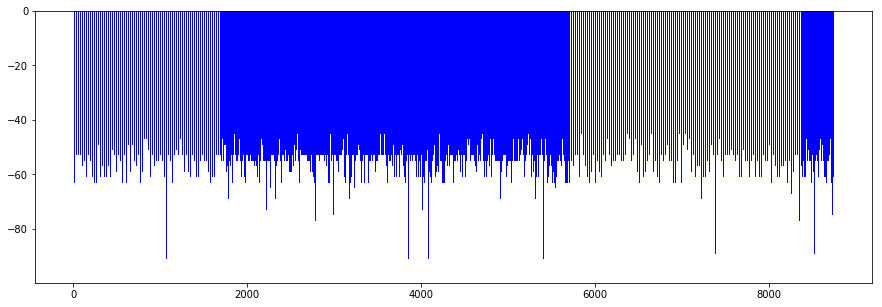

In [14]:
make_plot(X_test_noisy[:,[0]].T[0]*-100)

### After denoising
* Monitor : 0
* Mean : -55.261753
* Max : -44.3604
* Min : -66.05824
* Std : 4.8474064

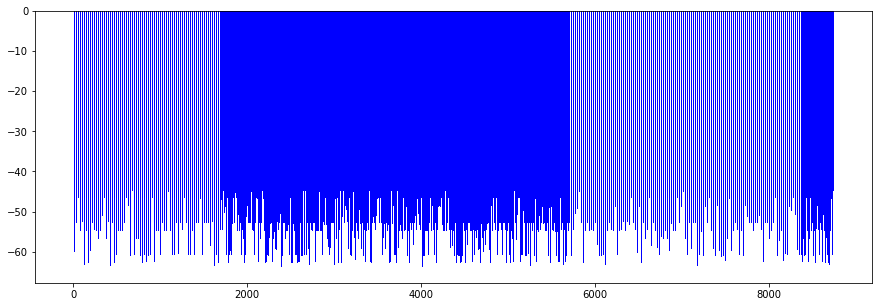

In [25]:
denoisy_signal = autoencoder.predict(X_test_noisy)*-100
make_plot(denoisy_signal[:, [0]].T[0])

### EXP 3 Accuracy = 96.4%, decreased 0.3
* Same condition to EXP 1
* Used denoised test data

In [43]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_test_p = scaler.transform(denoisy_signal)
print("Test accuracy: {:.3f}".format(svc.score(X_test_p, y_test_noisy)))

C:\Users\Famous\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Test accuracy: 0.964


### EXP 4 Accuracy = 95.3%, increased 0.9
* Same condition to EXP 2
* Used denoised test data

In [46]:
reduced_denoisy_signal = np.c_[denoisy_signal[:, 1], denoisy_signal[:, 2]]
scaler = MinMaxScaler()
scaler.fit(X_train_r)
X_test_p_r = scaler.transform(reduced_denoisy_signal)
print("Test accuracy: {:.3f}".format(svc_r.score(X_test_p_r, y_test_r)))

C:\Users\Famous\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Test accuracy: 0.953


In [9]:
masks = {1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[]}

for label in target:
    masks[label].append(True)
    for i in range(1, 8):
        if i == label:
            continue
        masks[i].append(False)

for key in masks:
    masks[key] = np.array(masks[key])

### Raw data clustering figure
* ##### 7 Room, 3 Monitor
* ##### Data : 8,750

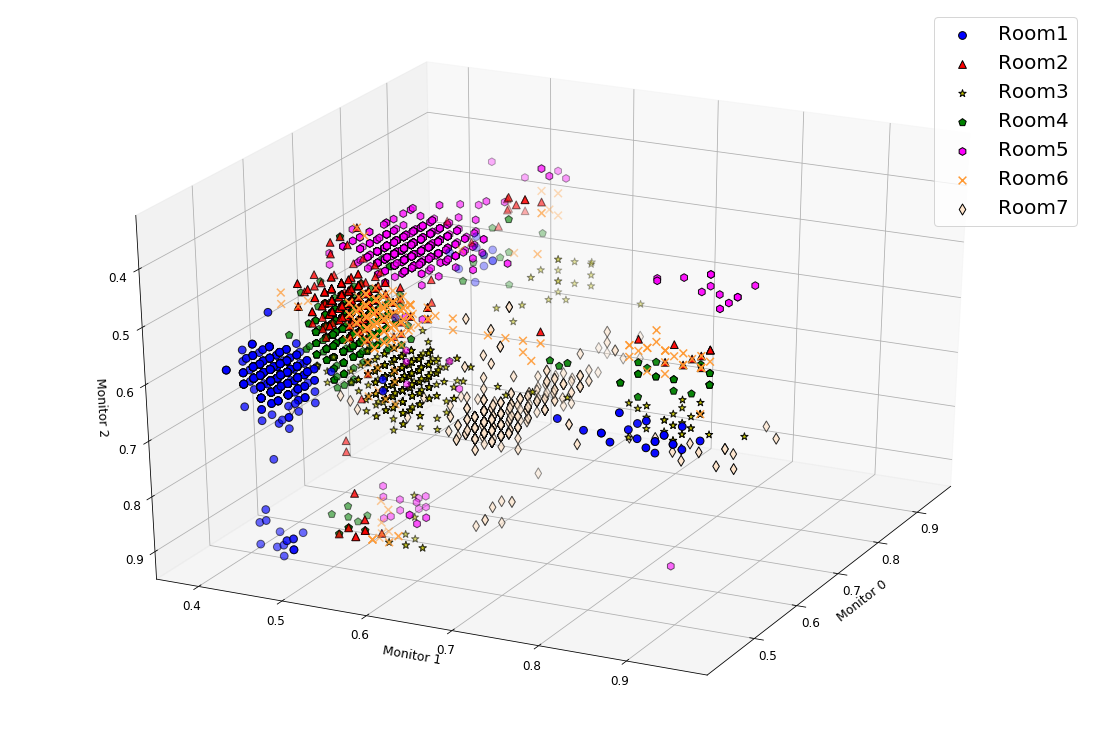

In [49]:
masks = make_scatter_masks(y_test_noisy)

figure = plt.figure(figsize=(15,10))
ax = Axes3D(figure, elev=-152, azim=-26)

mask = y_test_noisy == 0
ax.scatter(X_test_noisy[masks[1], 0], X_test_noisy[masks[1], 1], X_test_noisy[masks[1], 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_test_noisy[masks[2], 0], X_test_noisy[masks[2], 1], X_test_noisy[masks[2], 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_test_noisy[masks[3], 0], X_test_noisy[masks[3], 1], X_test_noisy[masks[3], 2], c='y', marker='*', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_test_noisy[masks[4], 0], X_test_noisy[masks[4], 1], X_test_noisy[masks[4], 2], c='g', marker='p', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_test_noisy[masks[5], 0], X_test_noisy[masks[5], 1], X_test_noisy[masks[5], 2], c='#FF00FF', marker='h', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_test_noisy[masks[6], 0], X_test_noisy[masks[6], 1], X_test_noisy[masks[6], 2], c='#FF9933', marker='x', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_test_noisy[masks[7], 0], X_test_noisy[masks[7], 1], X_test_noisy[masks[7], 2], c='#FFE5CC', marker='d', cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("Monitor 0", fontsize="12.5")
ax.set_ylabel("Monitor 1", fontsize="12.5")
ax.set_zlabel("Monitor 2", fontsize="12.5")

plt.legend(['Room1', 'Room2', 'Room3', 'Room4', 'Room5', 'Room6', 'Room7'])
params = {'legend.fontsize': 20,
          'legend.handlelength': 2,}

plt.rcParams.update(params)

plt.rc('xtick',labelsize=12.5)
plt.rc('ytick',labelsize=12.5)
plt.savefig('C:\\Users\\Famous\\Desktop\\raw.svg')

### Denoisy data clustering figure
* ##### 7 Room, 3 Monitor
* ##### Data : 8,750

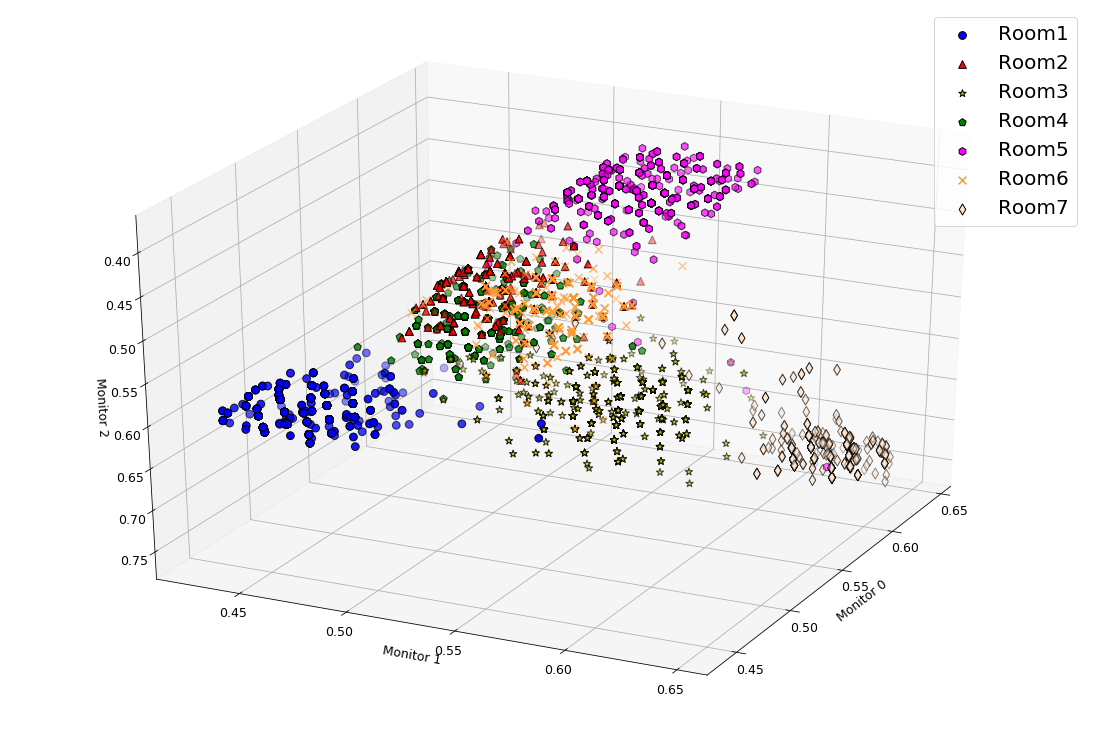

In [50]:
denoisy = denoisy_signal / -100

figure = plt.figure(figsize=(15,10))
ax = Axes3D(figure, elev=-152, azim=-26)

mask = y_test_noisy == 0
ax.scatter(denoisy[masks[1], 0], denoisy[masks[1], 1], denoisy[masks[1], 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(denoisy[masks[2], 0], denoisy[masks[2], 1], denoisy[masks[2], 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(denoisy[masks[3], 0], denoisy[masks[3], 1], denoisy[masks[3], 2], c='y', marker='*', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(denoisy[masks[4], 0], denoisy[masks[4], 1], denoisy[masks[4], 2], c='g', marker='p', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(denoisy[masks[5], 0], denoisy[masks[5], 1], denoisy[masks[5], 2], c='#FF00FF', marker='h', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(denoisy[masks[6], 0], denoisy[masks[6], 1], denoisy[masks[6], 2], c='#FF9933', marker='x', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(denoisy[masks[7], 0], denoisy[masks[7], 1], denoisy[masks[7], 2], c='#FFE5CC', marker='d', cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("Monitor 0", fontsize="12.5")
ax.set_ylabel("Monitor 1", fontsize="12.5")
ax.set_zlabel("Monitor 2", fontsize="12.5")

plt.legend(['Room1', 'Room2', 'Room3', 'Room4', 'Room5', 'Room6', 'Room7'])
params = {'legend.fontsize': 20,
          'legend.handlelength': 2,}

plt.rcParams.update(params)

plt.rc('xtick',labelsize=12.5)
plt.rc('ytick',labelsize=12.5)


plt.savefig('C:\\Users\\Famous\\Desktop\\denoisy.svg')